<a href="https://colab.research.google.com/github/bapukokare/Python/blob/master/tensorIoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter

%matplotlib inline

In [95]:
# Checking the encoding of the csv files
with open('/content/takehome_users_2.csv') as f:
    print(f)
    #for text in f:
        #print(text)
with open('/content/takehome_user_engagement_1.csv') as f:
    print(f)

<_io.TextIOWrapper name='/content/takehome_users_2.csv' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='/content/takehome_user_engagement_1.csv' mode='r' encoding='UTF-8'>


# New Section

In [96]:
# importing all the required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from pandas.io.json import json_normalize
from datetime import datetime, timedelta
import scipy.stats
import matplotlib.dates as mdates
import plotly.graph_objects as go
plt.style.use('bmh')

In [102]:
# Importing the csv file into a dataframe using the above encoding

# load as Pandas dataframe
users = pd.read_csv('/content/takehome_users.csv', parse_dates = ['creation_time'], encoding='latin-1')
user_eng = pd.read_csv('/content/takehome_user_engagement.csv',  parse_dates = ['time_stamp'],
                       encoding = "UTF-8")

In [123]:
# prompt: display users infor

users.head()


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


In [106]:
users.describe().T

,count,mean,std,min,25%,50%,75%,max
object_id,12000.0,6.000500e+03,3.464246e+03,1.000000e+00,3.000750e+03,6.000500e+03,9.000250e+03,1.200000e+04
last_session_creation_time,8823.0,1.379279e+09,1.953116e+07,1.338452e+09,1.363195e+09,1.382888e+09,1.398443e+09,1.402067e+09
opted_in_to_mailing_list,12000.0,2.495000e-01,4.327417e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
enabled_for_marketing_drip,12000.0,1.493333e-01,3.564316e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,12000.0,1.418846e+02,1.240567e+02,0.000000e+00,2.900000e+01,1.080000e+02,2.382500e+02,4.160000e+02
invited_by_user_id,6417.0,5.962957e+03,3.383762e+03,3.000000e+00,3.058000e+03,5.954000e+03,8.817000e+03,1.199900e+04


In [107]:
user_eng.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [108]:
#merge Data
# Merge data
merged_data = pd.merge(user_eng, users, left_on='user_id', right_on='object_id', how='left')

In [109]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5.913314e+03,3.394942e+03,1.000000e+00,3.087000e+03,5.682000e+03,8.944000e+03,1.200000e+04
visited,207917.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
object_id,207917.0,5.913314e+03,3.394942e+03,1.000000e+00,3.087000e+03,5.682000e+03,8.944000e+03,1.200000e+04
last_session_creation_time,207917.0,1.399439e+09,8.294017e+06,1.338452e+09,1.401045e+09,1.401665e+09,1.401868e+09,1.402067e+09
opted_in_to_mailing_list,207917.0,2.581367e-01,4.376106e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
enabled_for_marketing_drip,207917.0,1.545328e-01,3.614596e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
org_id,207917.0,1.643159e+02,1.211658e+02,0.000000e+00,6.000000e+01,1.450000e+02,2.600000e+02,4.160000e+02
invited_by_user_id,116887.0,5.972168e+03,3.247096e+03,3.000000e+00,3.269000e+03,5.972000e+03,8.513000e+03,1.199900e+04


In [110]:
# Define function to identify adopted users
def identify_adopted_users(df):
    df['login_time'] = pd.to_datetime(df['time_stamp'])
    df = df.sort_values(['user_id', 'login_time'])
    df['adopted'] = df.groupby('user_id')['login_time'].diff(periods=2) <= timedelta(days=7)
    adopted_users = df[df.groupby('user_id')['adopted'].transform('sum') >= 1]['user_id'].unique()
    return adopted_users

In [111]:
adopted_users = identify_adopted_users(merged_data)

In [112]:
# Convert 'creation_time' and 'last_session_creation_time' to datetime
merged_data['creation_time'] = pd.to_datetime(merged_data['creation_time'])
merged_data['last_session_creation_time'] = pd.to_datetime(merged_data['last_session_creation_time'], unit='s')

# Calculate the time difference in days
merged_data['days_since_creation'] = (merged_data['last_session_creation_time'] - merged_data['creation_time']).dt.days


In [113]:
merged_data.describe()

,user_id,visited,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,days_since_creation
count,207917.000000,207917.0,207917.000000,207917.000000,207917.000000,207917.000000,116887.000000,207917.000000
mean,5913.314197,1.0,5913.314197,0.258137,0.154533,164.315895,5972.167555,475.940697
std,3394.941674,0.0,3394.941674,0.437611,0.361460,121.165846,3247.095621,197.928422
min,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,3087.000000,1.0,3087.000000,0.000000,0.000000,60.000000,3269.000000,350.000000
50%,5682.000000,1.0,5682.000000,0.000000,0.000000,145.000000,5972.000000,527.000000
75%,8944.000000,1.0,8944.000000,1.000000,0.000000,260.000000,8513.000000,643.000000
max,12000.000000,1.0,12000.000000,1.000000,1.000000,416.000000,11999.000000,729.000000


from matplotlib import pyplot as plt
_df_0['user_id'].plot(kind='hist', bins=20, title='user_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['visited'].plot(kind='hist', bins=20, title='visited')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['object_id'].plot(kind='hist', bins=20, title='object_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['opted_in_to_mailing_list'].plot(kind='hist', bins=20, title='opted_in_to_mailing_list')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='user_id', y='visited', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='visited', y='object_id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='object_id', y='opted_in_to_mailing_list', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='opted_in_to_mailing_list', y='enabled_for_marketing_drip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['user_id'].plot(kind='line', figsize=(8, 4), title='user_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['visited'].plot(kind='line', figsize=(8, 4), title='visited')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['object_id'].plot(kind='line', figsize=(8, 4), title='object_id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['opted_in_to_mailing_list'].plot(kind='line', figsize=(8, 4), title='opted_in_to_mailing_list')
plt.gca().spines[['top', 'right']].set_visible(False)

In [114]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 15 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   object_id                   207917 non-null  int64         
 4   creation_time               207917 non-null  datetime64[ns]
 5   name                        207917 non-null  object        
 6   email                       207917 non-null  object        
 7   creation_source             207917 non-null  object        
 8   last_session_creation_time  207917 non-null  datetime64[ns]
 9   opted_in_to_mailing_list    207917 non-null  int64         
 10  enabled_for_marketing_drip  207917 non-null  int64         
 11  org_id                      207917 non-

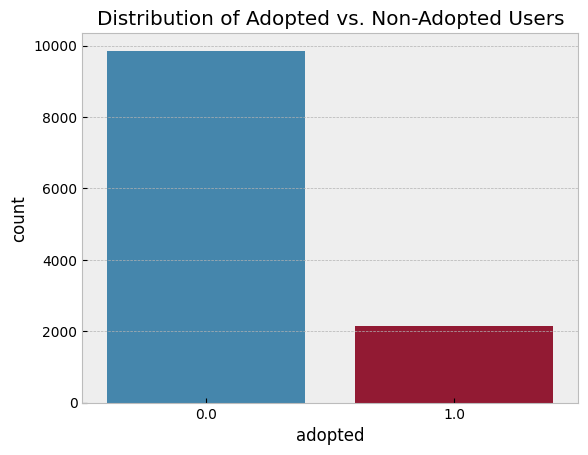

In [124]:
# Assuming 'time_stamp' is the column representing login times
merged_data['time_stamp'] = pd.to_datetime(merged_data['time_stamp'])

# Define a function to check if a user is adopted
def is_adopted(user_data):
    adopted = False
    if len(user_data) >= 3:
        user_data = user_data.sort_values('time_stamp')
        time_diff = user_data['time_stamp'].diff().dt.days
        if any(time_diff <= 7):
            adopted = True
    return adopted

# Apply the function to each user
adopted_users = merged_data.groupby('user_id').apply(is_adopted)
adopted_users = adopted_users[adopted_users].index  # Extract user_ids of adopted users

# Create a new 'adopted' column in the users DataFrame
merged_data['adopted'] = users['object_id'].isin(adopted_users).astype(int)

# Now you can use 'adopted' in your visualizations
sns.countplot(x='adopted', data=merged_data)
plt.title('Distribution of Adopted vs. Non-Adopted Users')
plt.show()


In [125]:
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
object_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
opted_in_to_mailing_list,207917.0,0.258137,0.437611,0.0,0.0,0.0,1.0,1.0
enabled_for_marketing_drip,207917.0,0.154533,0.361460,0.0,0.0,0.0,0.0,1.0
org_id,207917.0,164.315895,121.165846,0.0,60.0,145.0,260.0,416.0
invited_by_user_id,116887.0,5972.167555,3247.095621,3.0,3269.0,5972.0,8513.0,11999.0
days_since_creation,207917.0,475.940697,197.928422,0.0,350.0,527.0,643.0,729.0
adopted,12000.0,0.178417,0.382879,0.0,0.0,0.0,0.0,1.0


In [126]:
merged_data['last_session_creation_time'].min(), merged_data['last_session_creation_time'].max()

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [127]:
merged_data['creation_time'].min(), merged_data['creation_time'].max()

(Timestamp('2012-05-31 00:43:27'), Timestamp('2014-05-30 23:59:19'))

In [130]:
df= merged_data.copy()

In [131]:
df['date'] = pd.to_datetime(df.time_stamp.dt.date)

In [132]:
def rolling_count(df_group, frequency):
    return df_group.rolling(frequency, on='date')['user_id'].count()

In [133]:
df['visits_7_days'] = df.groupby('user_id', as_index=False, group_keys=False).apply(rolling_count, '7D')

In [134]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
object_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
opted_in_to_mailing_list,207917.0,0.258137,0.437611,0.0,0.0,0.0,1.0,1.0
enabled_for_marketing_drip,207917.0,0.154533,0.361460,0.0,0.0,0.0,0.0,1.0
org_id,207917.0,164.315895,121.165846,0.0,60.0,145.0,260.0,416.0
invited_by_user_id,116887.0,5972.167555,3247.095621,3.0,3269.0,5972.0,8513.0,11999.0
days_since_creation,207917.0,475.940697,197.928422,0.0,350.0,527.0,643.0,729.0
adopted,12000.0,0.178417,0.382879,0.0,0.0,0.0,0.0,1.0
visits_7_days,207917.0,4.381393,2.042666,1.0,3.0,4.0,6.0,7.0


In [135]:
df[df.visits_7_days >= 3.0]

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,login_time,days_since_creation,adopted,date,visits_7_days
9,2014-02-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-02-09 03:45:04,136,1.0,2014-02-09,3.0
10,2014-02-13 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2014-02-13 03:45:04,136,0.0,2014-02-13,3.0
27,2013-02-19 22:08:03,10,1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,2013-02-19 22:08:03,503,0.0,2013-02-19,3.0
30,2013-03-02 22:08:03,10,1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,2013-03-02 22:08:03,503,0.0,2013-03-02,3.0
31,2013-03-05 22:08:03,10,1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,2013-03-05 22:08:03,503,0.0,2013-03-05,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,2014-06-01 11:04:47,0,0,114,NaN,2014-05-23 11:04:47,78,NaN,2014-05-23,6.0
207899,2014-05-24 11:04:47,11988,1,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,2014-06-01 11:04:47,0,0,114,NaN,2014-05-24 11:04:47,78,NaN,2014-05-24,6.0
207900,2014-05-26 11:04:47,11988,1,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,2014-06-01 11:04:47,0,0,114,NaN,2014-05-26 11:04:47,78,NaN,2014-05-26,5.0
207901,2014-05-27 11:04:47,11988,1,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,2014-06-01 11:04:47,0,0,114,NaN,2014-05-27 11:04:47,78,NaN,2014-05-27,5.0


In [136]:
df['adopted_user'] = df['visits_7_days'].apply(lambda x: 1 if x>=3 else 0)

In [137]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
object_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
opted_in_to_mailing_list,207917.0,0.258137,0.437611,0.0,0.0,0.0,1.0,1.0
enabled_for_marketing_drip,207917.0,0.154533,0.361460,0.0,0.0,0.0,0.0,1.0
org_id,207917.0,164.315895,121.165846,0.0,60.0,145.0,260.0,416.0
invited_by_user_id,116887.0,5972.167555,3247.095621,3.0,3269.0,5972.0,8513.0,11999.0
days_since_creation,207917.0,475.940697,197.928422,0.0,350.0,527.0,643.0,729.0
adopted,12000.0,0.178417,0.382879,0.0,0.0,0.0,0.0,1.0
visits_7_days,207917.0,4.381393,2.042666,1.0,3.0,4.0,6.0,7.0


In [139]:
df.head()

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,login_time,days_since_creation,adopted,date,visits_7_days,adopted_user
0,2014-04-22 03:53:30,1,1,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,0,0.0,2014-04-22,1.0,0
1,2013-11-15 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,136,1.0,2013-11-15,1.0,0
2,2013-11-29 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-11-29 03:45:04,136,0.0,2013-11-29,1.0,0
3,2013-12-09 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-09 03:45:04,136,0.0,2013-12-09,1.0,0
4,2013-12-25 03:45:04,2,1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2013-12-25 03:45:04,136,0.0,2013-12-25,1.0,0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  int64         
 2   visited                     207917 non-null  int64         
 3   object_id                   207917 non-null  int64         
 4   creation_time               207917 non-null  datetime64[ns]
 5   name                        207917 non-null  object        
 6   email                       207917 non-null  object        
 7   creation_source             207917 non-null  object        
 8   last_session_creation_time  207917 non-null  datetime64[ns]
 9   opted_in_to_mailing_list    207917 non-null  int64         
 10  enabled_for_marketing_drip  207917 non-null  int64         
 11  org_id                      207917 non-

In [141]:
df.adopted_user.value_counts()

1    160522
0     47395
Name: adopted_user, dtype: int64

In [142]:
#fill null value
df['last_session_creation_time'].fillna(0, inplace = True)
df['adopted_user'].fillna(0, inplace = True)

In [144]:
df['email_domain'] = df.email.apply(lambda x: x.split('@')[1])

In [146]:
df['email_domain'].value_counts()

gmail.com         71310
yahoo.com         31411
hotmail.com       25434
jourrapide.com    23274
gustr.com         19509
                  ...  
rilig.com             1
ufrtv.com             1
slcaw.com             1
breuo.com             1
iuxiw.com             1
Name: email_domain, Length: 812, dtype: int64

In [148]:
df[~df.invited_by_user_id.isnull()].creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE'], dtype=object)

In [149]:
df.drop(['object_id', 'name', 'email', 'email_domain'], axis = 1, inplace = True)

In [151]:
df.invited_by_user_id.fillna(0, inplace=True)

In [155]:
df['days_since_creation'] = (user_eng.time_stamp.max() - df.creation_time).dt.days

In [156]:
df.drop(['creation_time', 'last_session_creation_time'], axis = 1, inplace = True)

In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
opted_in_to_mailing_list,207917.0,0.258137,0.437611,0.0,0.0,0.0,1.0,1.0
enabled_for_marketing_drip,207917.0,0.154533,0.361460,0.0,0.0,0.0,0.0,1.0
org_id,207917.0,164.315895,121.165846,0.0,60.0,145.0,260.0,416.0
invited_by_user_id,207917.0,3357.439502,3834.871624,0.0,0.0,1585.0,6442.0,11999.0
days_since_creation,207917.0,505.839965,173.240494,6.0,389.0,547.0,652.0,736.0
adopted,12000.0,0.178417,0.382879,0.0,0.0,0.0,0.0,1.0
visits_7_days,207917.0,4.381393,2.042666,1.0,3.0,4.0,6.0,7.0
adopted_user,207917.0,0.772048,0.419512,0.0,1.0,1.0,1.0,1.0


In [158]:
df.corr()['adopted_user']

<ipython-input-158-f40dd9265ec5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['adopted_user']


user_id                      -0.008956
visited                            NaN
opted_in_to_mailing_list     -0.005570
enabled_for_marketing_drip   -0.012589
org_id                        0.031526
invited_by_user_id           -0.004230
days_since_creation           0.304814
adopted                      -0.004616
visits_7_days                 0.765048
adopted_user                  1.000000
Name: adopted_user, dtype: float64

In [159]:
df = pd.get_dummies(df, columns=['creation_source'])

In [160]:
df.corr()['adopted_user']

<ipython-input-160-f40dd9265ec5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['adopted_user']


user_id                              -0.008956
visited                                    NaN
opted_in_to_mailing_list             -0.005570
enabled_for_marketing_drip           -0.012589
org_id                                0.031526
invited_by_user_id                   -0.004230
days_since_creation                   0.304814
adopted                              -0.004616
visits_7_days                         0.765048
adopted_user                          1.000000
creation_source_GUEST_INVITE          0.002175
creation_source_ORG_INVITE           -0.005230
creation_source_PERSONAL_PROJECTS    -0.011491
creation_source_SIGNUP               -0.010716
creation_source_SIGNUP_GOOGLE_AUTH    0.024299
Name: adopted_user, dtype: float64

In [161]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,207917.0,5913.314197,3394.941674,1.0,3087.0,5682.0,8944.0,12000.0
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
opted_in_to_mailing_list,207917.0,0.258137,0.437611,0.0,0.0,0.0,1.0,1.0
enabled_for_marketing_drip,207917.0,0.154533,0.361460,0.0,0.0,0.0,0.0,1.0
org_id,207917.0,164.315895,121.165846,0.0,60.0,145.0,260.0,416.0
invited_by_user_id,207917.0,3357.439502,3834.871624,0.0,0.0,1585.0,6442.0,11999.0
days_since_creation,207917.0,505.839965,173.240494,6.0,389.0,547.0,652.0,736.0
adopted,12000.0,0.178417,0.382879,0.0,0.0,0.0,0.0,1.0
visits_7_days,207917.0,4.381393,2.042666,1.0,3.0,4.0,6.0,7.0
adopted_user,207917.0,0.772048,0.419512,0.0,1.0,1.0,1.0,1.0


In [162]:
df.drop(['visited'], axis = 1, inplace = True)

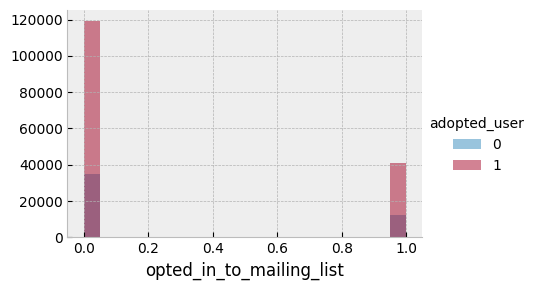

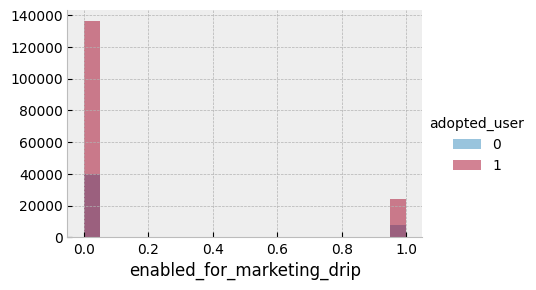

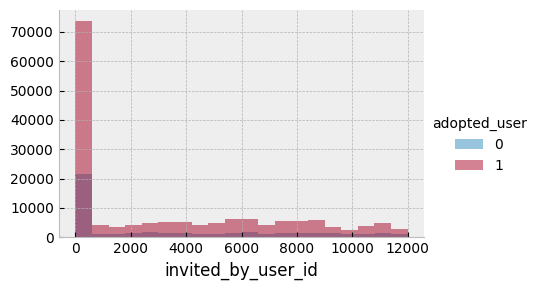

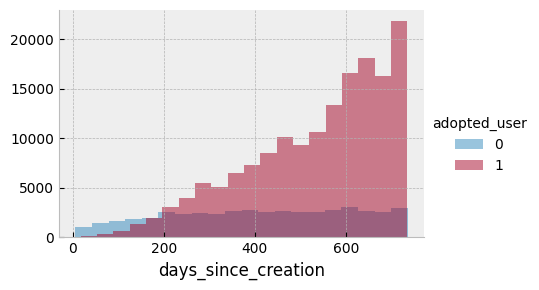

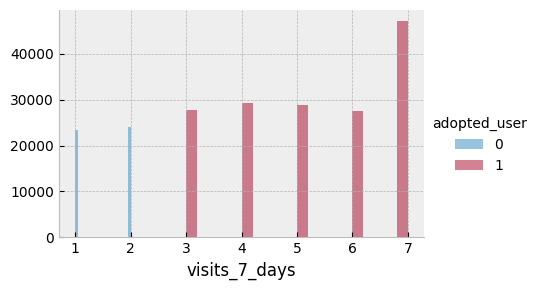

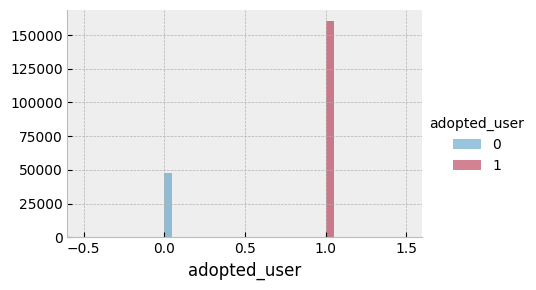

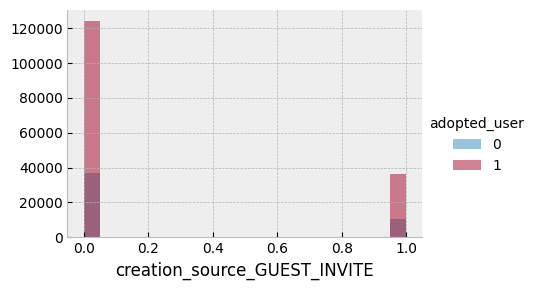

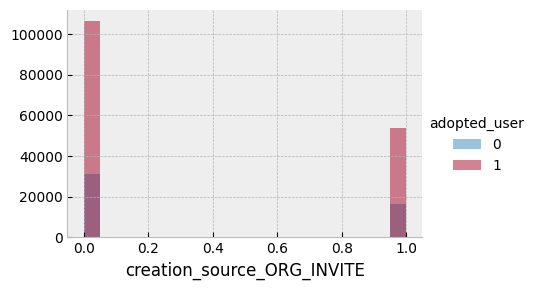

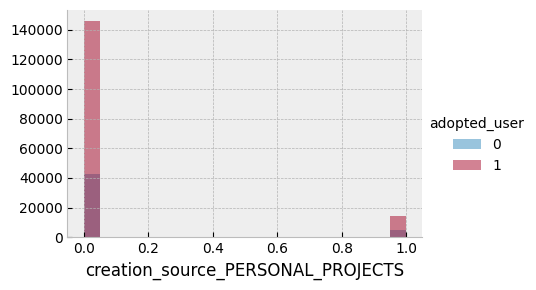

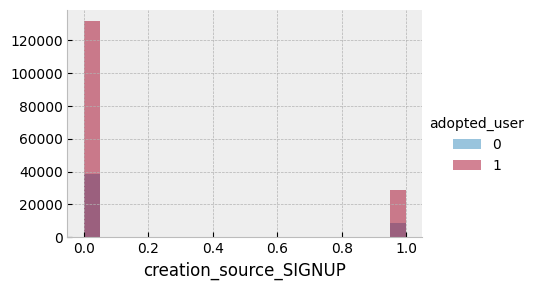

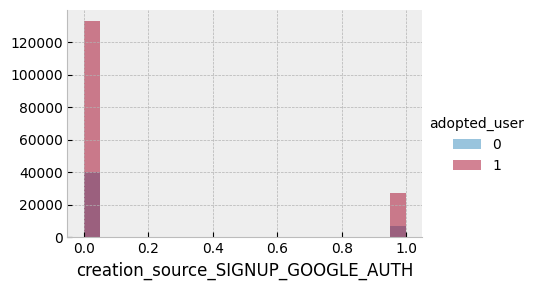

In [164]:
for col in ['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited_by_user_id','days_since_creation','visits_7_days', 'adopted_user','creation_source_GUEST_INVITE',
           'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
           'creation_source_SIGNUP_GOOGLE_AUTH']:
    g = sns.FacetGrid(df, hue = "adopted_user", height=3, aspect=1.5,)
    g.map(plt.hist, col, alpha=.5, bins = 20)
    g.add_legend()

Apply random forest resgression since data is unbalanced

In [165]:
# Importing necessary packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score,\
precision_score, recall_score, f1_score

In [184]:
def cv_optimize(model, parameters, Xtrain, ytrain, n_folds = 5):
    """
    Cross validation. Function to hypertune the model "model" with the input paramete distribution using
    "parameters" on the training data.
    The output will be the best estimator whose average score on all folds will be best.
    """
    clf = GridSearchCV(model, param_grid = parameters, cv = n_folds, scoring = 'accuracy')
    t0 = time.time()
    clf.fit(Xtrain, ytrain)
    time_fit = time.time() - t0
    print('\n\n\n=============================',type(model).__name__,'=================================\n')
    print("It takes %.3f seconds for tuning " % (time_fit))
    print("BEST PARAMS", clf.best_params_)
    best = clf.best_estimator_
    return best

def do_classify(model, parameters, df, targetname, scale = True, cols_to_transform = 'numeric',
                featurenames = 'all', train_size = 0.8):

    # Creating the X and y variables for our model
    if featurenames == 'all':
        X = df.drop([targetname], axis = 1)
    else:
        X = df[featurenames]

    y = df[targetname]

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size = train_size)

    model = cv_optimize(model, parameters, Xtrain, ytrain)
    t0 = time.time()
    model = model.fit(Xtrain, ytrain)
    time_fit = time.time() - t0
    print("It takes %.3f seconds for fitting" % (time_fit))
    training_accuracy = model.score(Xtrain, ytrain)
    test_accuracy = model.score(Xtest, ytest)
    precision = precision_score(ytest, model.predict(Xtest))
    recall = recall_score(ytest, model.predict(Xtest))
    AUC = roc_auc_score(ytest, model.predict_proba(Xtest)[:,1])

    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    print("Precision on test data:    {:0.2f}".format(precision))
    print("Recall on test data:       {:0.2f}".format(recall))
    print("AUC on test data:          {:0.2f}".format(AUC))
    print("=======Confusion Matrix=========")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("=======Classification report=======")
    print(classification_report(ytest, model.predict(Xtest)))
    print("="*100)
    print("="*100)
    print("="*100)
    return model, Xtrain, ytrain, Xtest, ytest

In [200]:
# Random Forest model
model_rf = RandomForestClassifier(class_weight='balanced') # adding balanced to handle the unbalanced data
#RandomForestClassifier(max_features='sqrt', random_state=42)
parameters_rf = {
                 'n_estimators': [10, 25, 50, 75, 100],
                 'criterion': ["gini", "entropy"],
                 'max_depth': [3, 6, 10, 12],
                 'max_features': ['sqrt']
                }

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207917 entries, 0 to 207916
Data columns (total 9 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   opted_in_to_mailing_list            207917 non-null  int64  
 1   invited_by_user_id                  207917 non-null  float64
 2   visits_7_days                       207917 non-null  float64
 3   adopted_user                        207917 non-null  int64  
 4   creation_source_GUEST_INVITE        207917 non-null  uint8  
 5   creation_source_ORG_INVITE          207917 non-null  uint8  
 6   creation_source_PERSONAL_PROJECTS   207917 non-null  uint8  
 7   creation_source_SIGNUP              207917 non-null  uint8  
 8   creation_source_SIGNUP_GOOGLE_AUTH  207917 non-null  uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 17.0 MB


In [188]:
df.drop(['user_id','date','time_stamp','enabled_for_marketing_drip'], axis = 1, inplace = True)

In [193]:
df.drop(['login_time'], axis = 1, inplace = True)

In [201]:
model_rf, Xtrain, ytrain, Xtest, ytest = do_classify(model_rf, parameters_rf,
                                                                  df, targetname = 'adopted_user')




============================= RandomForestClassifier =================================

It takes 418.437 seconds for tuning 
BEST PARAMS {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 10}
It takes 0.424 seconds for fitting
Accuracy on training data: 1.00
Accuracy on test data:     1.00
Precision on test data:    1.00
Recall on test data:       1.00
AUC on test data:          1.00
=======Confusion Matrix=========
[[ 9491     0]
 [    0 32093]]
=======Classification report=======
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9491
           1       1.00      1.00      1.00     32093

    accuracy                           1.00     41584
   macro avg       1.00      1.00      1.00     41584
weighted avg       1.00      1.00      1.00     41584



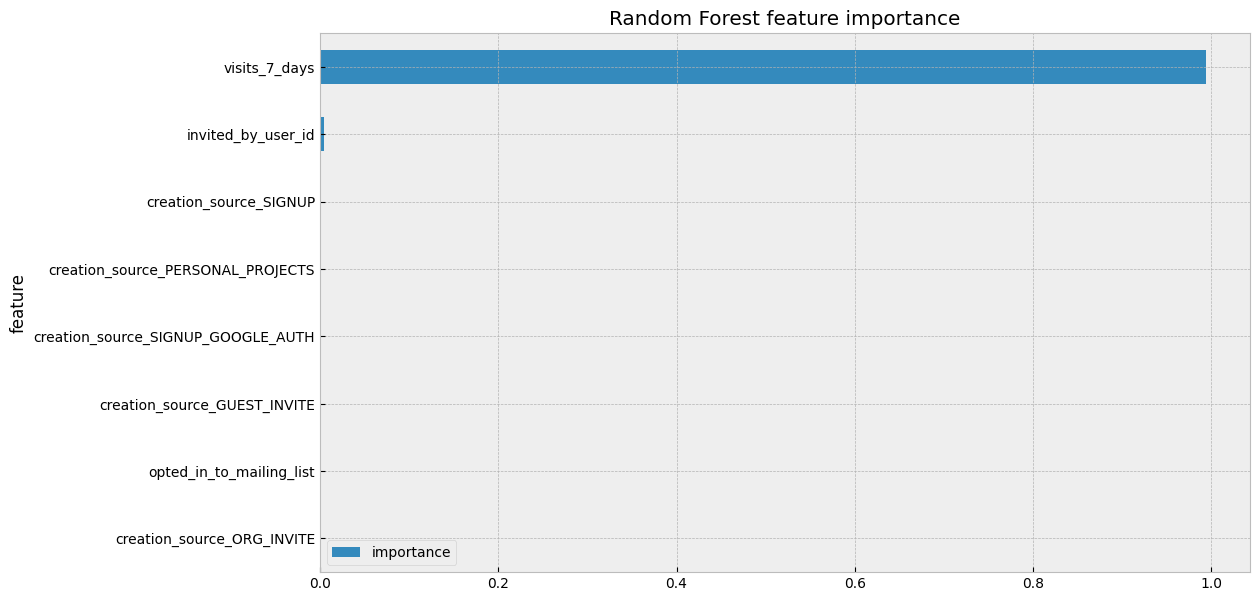

In [202]:
feat_imp = pd.DataFrame({'importance':model_rf.feature_importances_})
feat_imp['feature'] = Xtrain.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
_ = feat_imp.plot.barh(title = 'Random Forest feature importance', figsize = (12,7))